In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
plt.style.use('seaborn-white')
%matplotlib inline

In [3]:
#Load the first dataset that Dana ran
data=pd.read_csv('../data/round1/batch1_usable_data.csv')
data.rename(columns={'Runtime(s)':'t','Fill Vol(mm^3)':'Vfil','Support Vol(mm^3)':'Vsup','Layer Height(mm)':'dh','Mesh Volume(mm^3)':'Vmes','BB Vol(mm^3)':'Vbb','CVHull Vol(mm^3)':'Vch','Surface Area(mm^2)':"Sa"},inplace=True)
print len(data)

4628


(0, 200000)

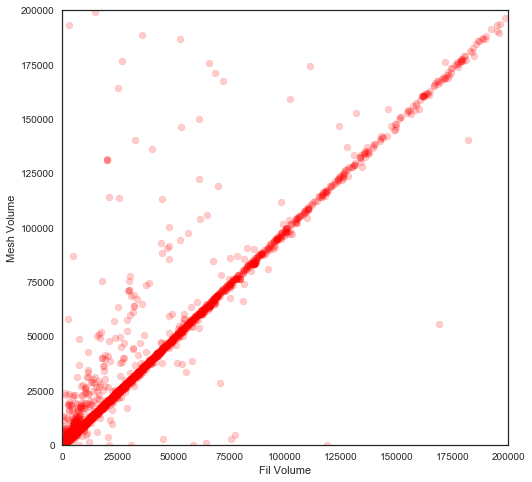

In [5]:
fig, ax1 = plt.subplots(1,1, figsize=(8,8))
xmax=200000
plt.scatter(data['Vfil'],data['Vmes'],color='red',alpha=0.2)
plt.xlabel('Fil Volume')
plt.ylabel('Mesh Volume')
plt.xlim(0,xmax)
plt.ylim(0,xmax)

### Now plot the "truth info"
   * What we see is that the time scales with the (fill volume + support volume) however at different rates with and without the presence of support volume. Hence a 2D linear regression for {fill volume, support volume} would essentially give you the back the input

In [12]:
sd=data[data['Vfil']<1000000]
# use the first 2500 to train
sd=sd.head(2500)
print len(sd)
sd.info()

2500

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4574 entries, 0 to 4627
Data columns (total 13 columns):
Mesh     4574 non-null object
t        4574 non-null float64
Vfil     4574 non-null int64
Vsup     4574 non-null int64
dh       4574 non-null float64
Vmes     4574 non-null float64
X        4574 non-null float64
Y        4574 non-null float64
Z        4574 non-null float64
Vbb      4574 non-null float64
Vch      4574 non-null float64
Sa       4574 non-null float64
Euler    4574 non-null int64
dtypes: float64(9), int64(3), object(1)
memory usage: 500.3+ KB


(0, 1000000)

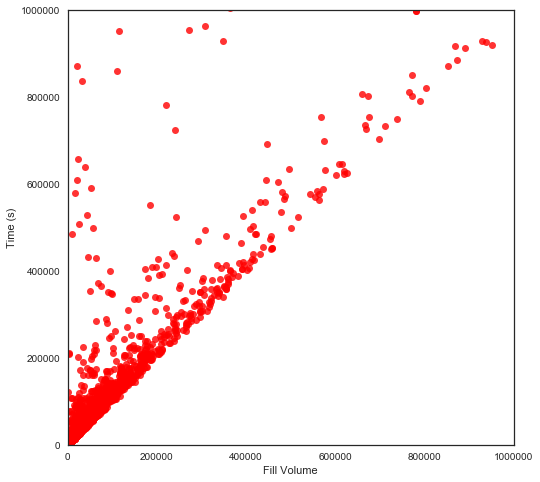

In [11]:

fig, ax1 = plt.subplots(1,1, figsize=(8,8))
xmax=1000000
cut=(sd.Vfil<xmax)
sns.regplot(sd.Vfil[cut],sd.t[cut],scatter_kws={'color':'r'},fit_reg=False)
plt.xlabel('Fill Volume')
plt.ylabel('Time (s)')
plt.xlim(0,xmax)
plt.ylim(0,xmax)

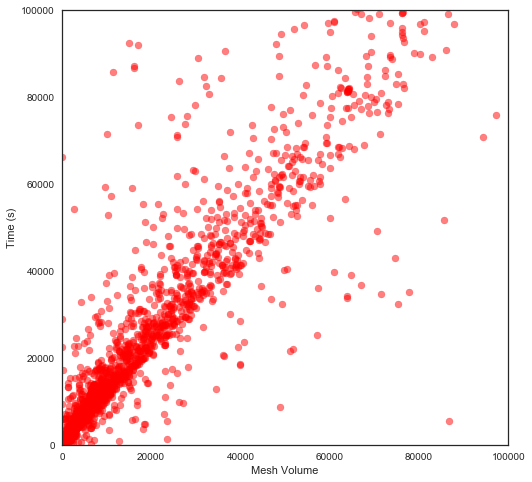

In [18]:
fig, ax1 = plt.subplots(1,1, figsize=(8,8))
xmax=100000
cut=(sd.Vmes<xmax)
plt.scatter(sd.Vmes[cut],sd.t[cut],color='red',alpha=0.5)
plt.xlabel('Mesh Volume')
plt.ylabel('Time (s)')
plt.xlim(0,xmax)
plt.ylim(0,xmax)
plt.savefig('t_vs_Vmes.png')

In [5]:
# use the first 2000 to train
sd=sd.head(2500)
len(sd)

NameError: name 'sd' is not defined

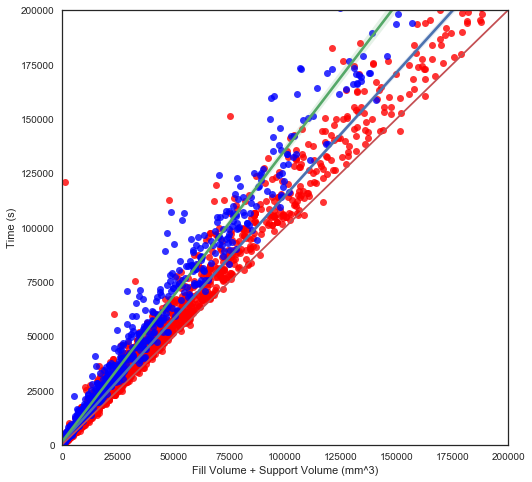

In [11]:
fig, ax1 = plt.subplots(1,1, figsize=(8,8))
xmax=200000
cut=(sd.Vfil+sd.Vsup<xmax)&(sd.Vsup/sd.Vfil<0.1)
sns.regplot(sd.Vfil[cut]+sd.Vsup[cut],sd.t[cut],scatter_kws={'color':'r'})
cut=(sd.Vfil+sd.Vsup<xmax)&(sd.Vsup/sd.Vfil>0.1)
sns.regplot(sd.Vfil[cut]+sd.Vsup[cut],sd.t[cut],scatter_kws={'color':'b'})
plt.xlabel('Fill Volume + Support Volume (mm^3)')
plt.ylabel('Time (s)')
plt.xlim(0,xmax)
plt.ylim(0,xmax)
plt.plot([0,xmax],[0,xmax])

verify this by explicitly plot those parts without support volume

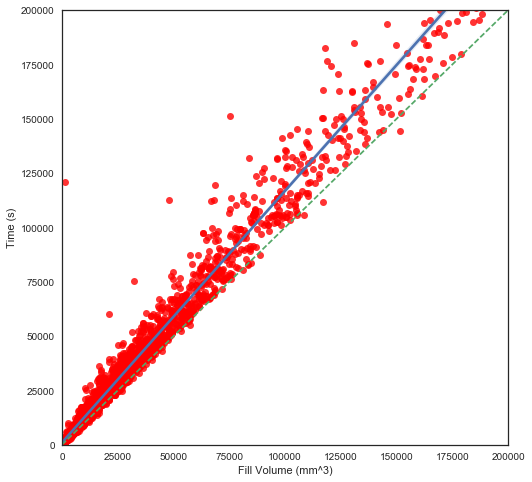

In [29]:
fig, ax1 = plt.subplots(1,1, figsize=(8,8))
xmax=200000
cut=((sd.Vfil+sd.Vsup)<xmax)&(sd.Vsup/sd.Vfil<0.1)
#sns.regplot(sd.Vfil[cut]+sd.Vsup[cut],sd.t[cut],scatter_kws={'color':'r'})
sns.regplot(sd.Vfil[cut],sd.t[cut],scatter_kws={'color':'r'})
plt.xlabel('Fill Volume (mm^3)')
plt.ylabel('Time (s)')
plt.xlim(0,xmax)
plt.ylim(0,xmax)
plt.plot([0,xmax],[0,xmax],'--')

The Z information is also important since it is a special direction in 3-D printing

(0, 200000)

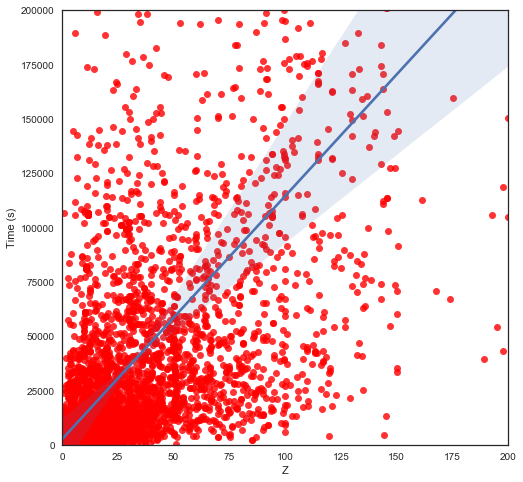

In [16]:
fig, ax1 = plt.subplots(1,1, figsize=(8,8))
xmax=200000
cut=(sd.Vfil<xmax)
sns.regplot(sd.Z[cut],sd.t[cut],scatter_kws={'color':'r'},fit_reg=True)
plt.xlabel('Z')
plt.ylabel('Time (s)')
plt.xlim(0,200)
plt.ylim(0,xmax)

(0, 50000)

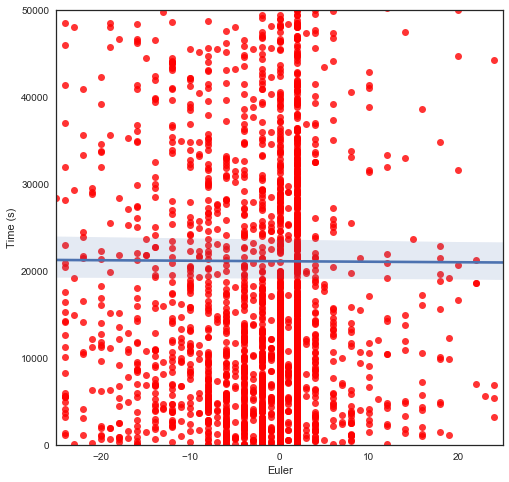

In [28]:
fig, ax1 = plt.subplots(1,1, figsize=(8,8))
xmax=50000
cut=(sd.Vfil<xmax)
sns.regplot(sd.Euler[cut],sd.t[cut],scatter_kws={'color':'r'},fit_reg=True)
plt.xlabel('Euler')
plt.ylabel('Time (s)')
plt.xlim(-25,25)
plt.ylim(0,xmax)

(0, 50000)

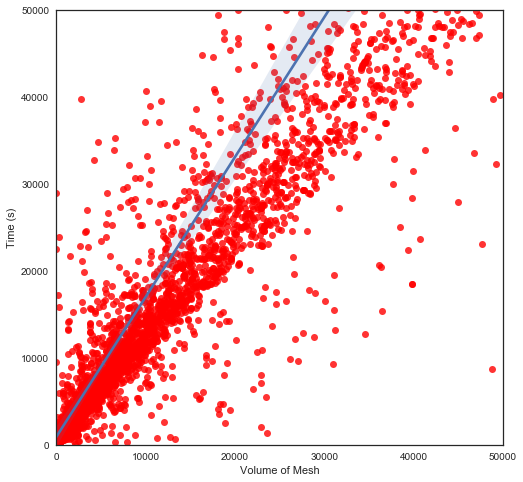

In [30]:
fig, ax1 = plt.subplots(1,1, figsize=(8,8))
xmax=50000
cut=(sd.Vmes<xmax)
sns.regplot(sd.Vmes[cut],sd.t[cut],scatter_kws={'color':'r'},fit_reg=True)
plt.xlabel('Volume of Mesh')
plt.ylabel('Time (s)')
plt.xlim(0,xmax)
plt.ylim(0,xmax)